<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Занятие 5. Композиции алгоритмов, случайный лес</center>
## <center> Часть 3. Оценка важности признаков с помощью случайного леса</center>

## Суть метода

По данной картинке интуитивно понятно, что важность признака "Возраст" в задаче кредитного скоринга выше, чем важность признака "Доход". Формализуется это с помощью понятия прироста информации.
<img src="../../img/decision_tree2.gif">

Если посторить много деревьев решений (случайный лес), то чем выше в среднем признак в дереве решений, тем он важнее в данной задаче классификации/регрессии.

**Пример.** 

Рассмотрим результаты анкетирования посетителей хостелов с сайтов Booking.com и TripAdvisor.com. Признаки - средние оценки по разным факторам (перечислены ниже) - персонал, состояние комнат и т.д. 
Целевой признак - рейтинг хостела на сайте.

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import seaborn as sns
# russian headres
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)
import pandas as pd
import numpy as np
from sklearn.ensemble.forest import RandomForestRegressor

Populating the interactive namespace from numpy and matplotlib


In [3]:
hostel_data = pd.read_csv("../../data/hostel_factors.csv") 
hostel_data.head(2)

,hostel,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,rating
0,hostel1,0.675,0.1,0.300000,0.875000,0.250000,0.425000,0.35,0.725000,0.400000,0.275,9.0
1,hostel2,0.500,0.0,0.058824,0.573529,0.117647,0.382353,0.00,0.161765,0.308824,0.000,8.3


In [4]:
features = {"f1":u"Персонал",
"f2":u"Бронирование хостела ",
"f3":u"Заезд в хостел и выезд из хостела",
"f4":u"Состояние комнаты",
"f5":u"Состояние общей кухни",
"f6":u"Состояние общего пространства",
"f7":u"Дополнительные услуги",
"f8":u"Общие условия и удобства",
"f9":u"Цена/качество",
"f10":u"ССЦ"}

In [5]:
forest = RandomForestRegressor(n_estimators=1000,
                               max_features=10,
                                random_state=0)

forest.fit(hostel_data.drop(['hostel', 'rating'], axis=1), 
           hostel_data['rating'])
importances = forest.feature_importances_
importances

array([ 0.18275657,  0.0536145 ,  0.06152141,  0.03930534,  0.07427316,
        0.12829575,  0.11660351,  0.08858868,  0.14837347,  0.1066676 ])

Feature ranking:
1. Персонал 0.182757 
2. Цена/качество 0.148373 
3. Состояние общего пространства 0.128296 
4. Дополнительные услуги 0.116604 
5. ССЦ 0.106668 
6. Общие условия и удобства 0.088589 
7. Состояние общей кухни 0.074273 
8. Заезд в хостел и выезд из хостела 0.061521 
9. Бронирование хостела  0.053615 
10. Состояние комнаты 0.039305 


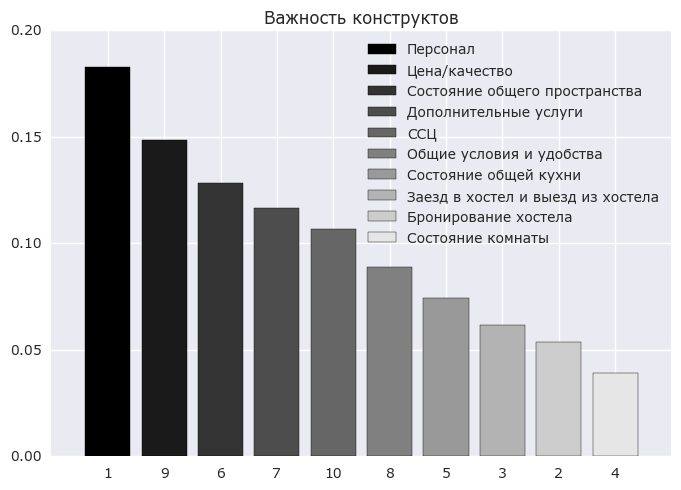

In [6]:
indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")
  
for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, 
            features["f"+str(feature_indices[f])], 
            importances[indices[f]]))
plt.figure()
plt.title(u"Важность конструктов")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot)) 
               for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) 
                  for i in feature_indices]);